<a href="https://colab.research.google.com/github/mchandler-CPT/mscai-eportfolio/blob/main/CIFAR10_IndividualAssignment_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Baseline CNN

In [ ]:
# Core libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical, plot_model
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Define a path in your Drive to save models and outputs
# Make sure to create a "Colab_Models" folder in your Google Drive first!
SAVE_PATH = '/content/gdrive/My Drive/Colab_Models/'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Define class names for plotting
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Mounted at /content/gdrive


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Raw dataset loaded successfully.
Displaying sample images and class distribution...


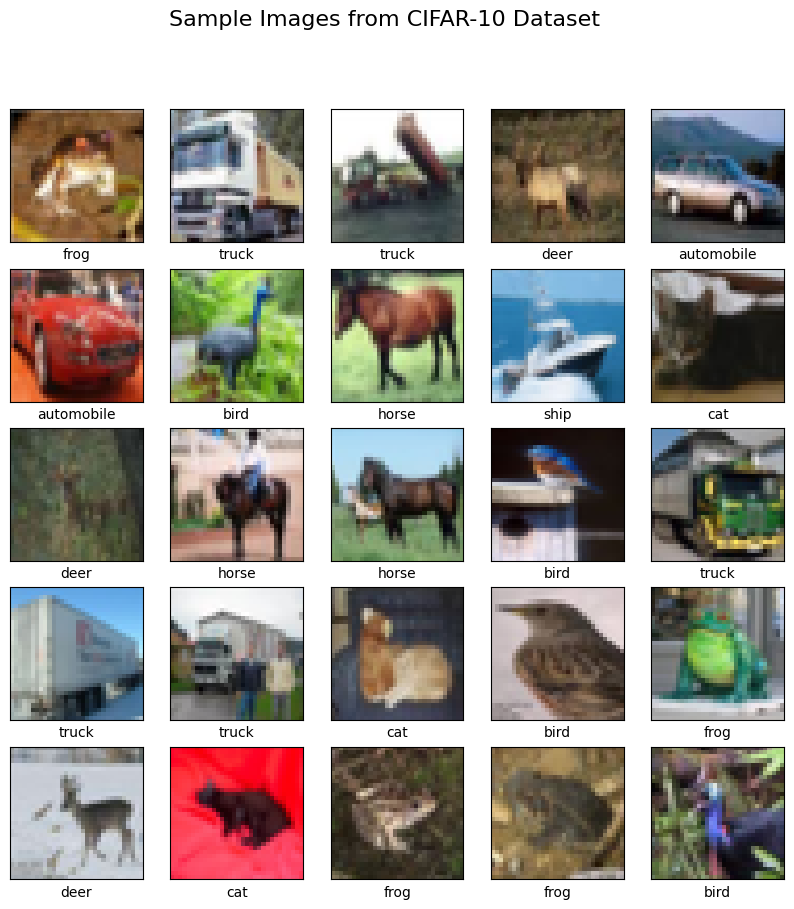

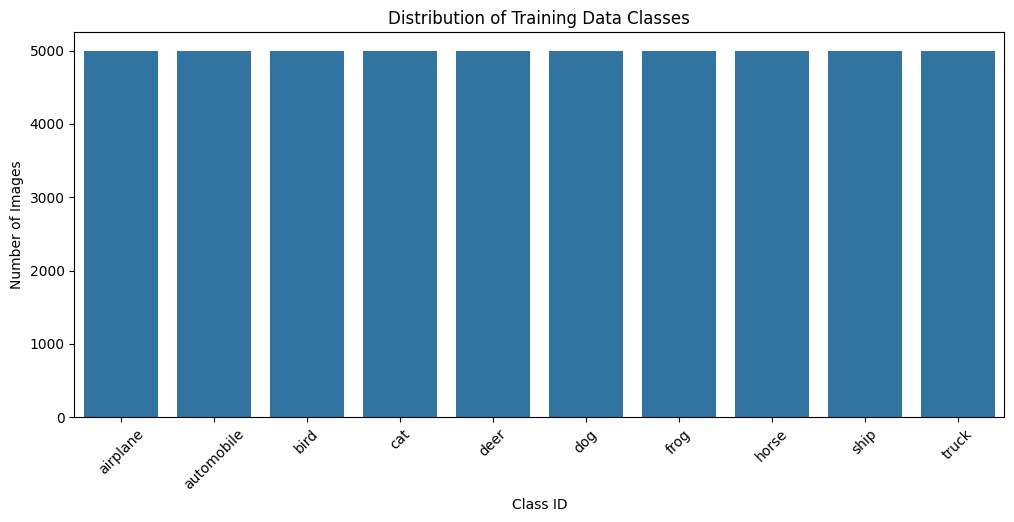


Processing and splitting data...

Data preparation complete. All required data versions have been created.


In [ ]:
# --- 1. Load the original, unscaled data ---
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = cifar10.load_data()
print("Raw dataset loaded successfully.")

# --- 2. Visualize the raw data immediately after loading ---
print("Displaying sample images and class distribution...")

# 📊 VISUAL 1: Sample Images Grid
plt.figure(figsize=(10, 10))
plt.suptitle('Sample Images from CIFAR-10 Dataset', fontsize=16)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_raw[i])  # Use the raw x_train for original images
    plt.xlabel(CLASS_NAMES[y_train_raw[i][0]])
plt.show()

# 📊 VISUAL 2: Class Distribution Bar Chart
plt.figure(figsize=(12, 5))
sns.countplot(x=y_train_raw.flatten(), order=range(10))
plt.title('Distribution of Training Data Classes')
plt.xlabel('Class ID')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(10), labels=CLASS_NAMES, rotation=45)
plt.show()

# --- 3. Now, process and split the data for all experiments ---
print("\nProcessing and splitting data...")

# Create normalized version for early models
x_train_norm = x_train_raw.astype('float32') / 255.0
x_test_norm = x_test_raw.astype('float32') / 255.0

# Create one-hot encoded labels (used by all models)
y_train_one_hot = to_categorical(y_train_raw, 10)
y_test_one_hot = to_categorical(y_test_raw, 10)

# --- Create validation splits for BOTH data versions ---

# Splits from RAW data (for models that process internally)
x_val_raw = x_train_raw[-10000:]
x_train_split_raw = x_train_raw[:-10000]

# Splits from NORMALIZED data (for early custom CNNs)
x_val_norm = x_train_norm[-10000:]
x_train_split_norm = x_train_norm[:-10000]

# The label splits are the same for both
y_val_one_hot = y_train_one_hot[-10000:]
y_train_split_one_hot = y_train_one_hot[:-10000]

print("\nData preparation complete. All required data versions have been created.")

Loading Baseline CNN from checkpoint...

Model Summary


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)


Model Architecture Diagram saved as 'baseline_cnn_architecture.png'

Plotting learning curves...


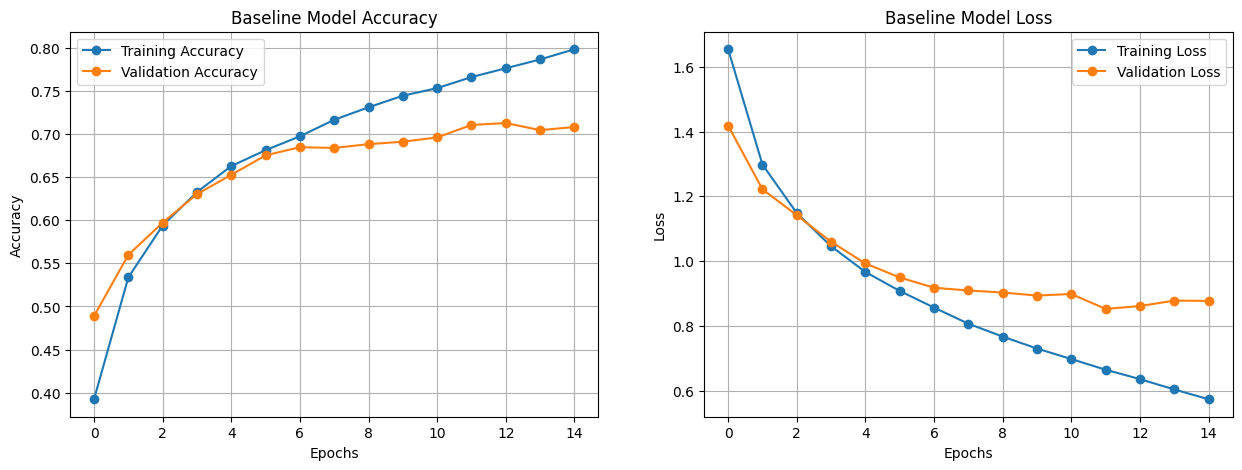

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Classification Report
              precision    recall  f1-score   support

    airplane       0.75      0.68      0.71      1000
  automobile       0.86      0.79      0.83      1000
        bird       0.60      0.61      0.60      1000
         cat       0.52      0.55      0.53      1000
        deer       0.64      0.70      0.67      1000
         dog       0.64      0.57      0.61      1000
        frog       0.70      0.81      0.76      1000
       horse       0.80      0.67      0.73      1000
        ship       0.80      0.82      0.81      1000
       truck       0.76      0.83      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000


Confusion Matrix


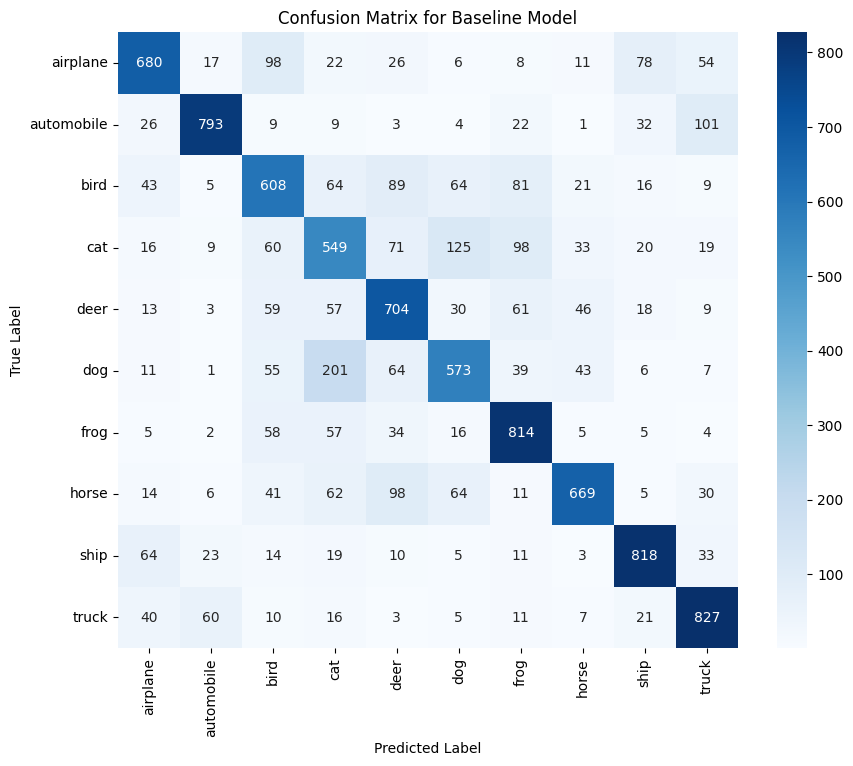


Final Test Accuracy
Final Test Accuracy (Baseline Model): 70.35%


In [ ]:
# --- 1. Define File Paths ---
# Define paths in your Drive for the model and its history
baseline_model_path = os.path.join(SAVE_PATH, 'baseline_cnn.keras')
baseline_history_path = os.path.join(SAVE_PATH, 'history_baseline.npy')

# --- 2. Checkpoint Logic: Load or Train ---
if os.path.exists(baseline_model_path):
    # If it exists, load the model and history
    print("Loading Baseline CNN from checkpoint...")
    model = models.load_model(baseline_model_path)
    history_dict = np.load(baseline_history_path, allow_pickle=True).item()
else:
    # If it does NOT exist, define, compile, and train the model
    print("No checkpoint found. Training Baseline CNN from scratch...")
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ], name="Baseline_CNN")

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train_split_norm, y_train_split_one_hot,
                        epochs=15,
                        batch_size=64,
                        validation_data=(x_val_norm, y_val_one_hot))

    # Save the newly trained model and its history to your Drive
    model.save(baseline_model_path)
    np.save(baseline_history_path, history.history)
    history_dict = history.history
    print(f"Baseline CNN trained and saved to {SAVE_PATH}")

# --- 3. Key Visuals & Metrics ---

# 📊 VISUAL 1: Model Summary (Text-based visual)
print("\n" + "="*50)
print("Model Summary")
print("="*50)
model.summary()

# 📊 VISUAL 2: Model Architecture Diagram
# This saves a diagram of your model to a file, perfect for your slides
plot_model(model, to_file='baseline_cnn_architecture.png', show_shapes=True, show_layer_names=True)
print("\nModel Architecture Diagram saved as 'baseline_cnn_architecture.png'")
# display(plt.imread('baseline_cnn_architecture.png')) # Uncomment to display in Colab

# 📊 VISUAL 3: Learning Curves (Accuracy & Loss)
print("\nPlotting learning curves...")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], 'o-', label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], 'o-', label='Validation Accuracy')
plt.title('Baseline Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], 'o-', label='Training Loss')
plt.plot(history_dict['val_loss'], 'o-', label='Validation Loss')
plt.title('Baseline Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# --- 4. Final Evaluation & Detailed Metrics ---

# Get predictions on the test set
y_pred_probs = model.predict(x_test_norm)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# 📊 VISUAL 4: Classification Report (Precision, Recall, F1-Score)
from sklearn.metrics import classification_report
print("\n" + "="*50)
print("Classification Report")
print("="*50)
print(classification_report(y_true_classes, y_pred_classes, target_names=CLASS_NAMES))

# 📊 VISUAL 5: Confusion Matrix
from sklearn.metrics import confusion_matrix
print("\n" + "="*50)
print("Confusion Matrix")
print("="*50)
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Baseline Model')
plt.show()

# Final accuracy score
print("\n" + "="*50)
print("Final Test Accuracy")
print("="*50)
test_loss, test_acc = model.evaluate(x_test_norm, y_test_one_hot, verbose=0)
print(f'Final Test Accuracy (Baseline Model): {test_acc*100:.2f}%')

# Part 2: Improved CNN (with Augmentation & Dropout)

--- Visualizing Data Augmentation ---


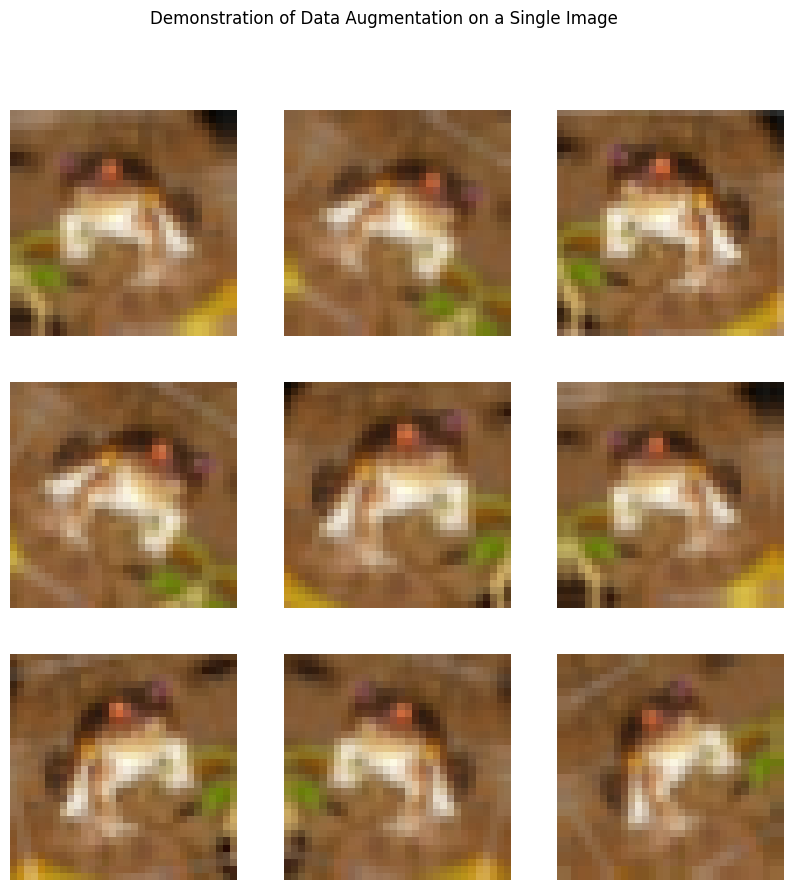


Loading Improved CNN from checkpoint...

Improved Model Summary & Diagram


Model: "Improved_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

Model Architecture Diagram saved as 'improved_cnn_architecture.png'

Plotting learning curves...


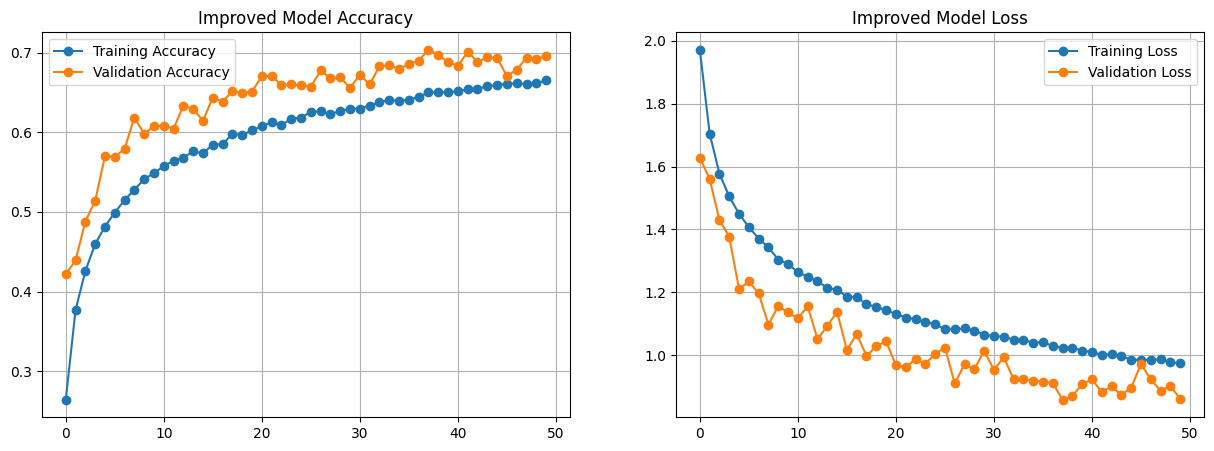

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report
              precision    recall  f1-score   support

    airplane       0.77      0.74      0.76      1000
  automobile       0.82      0.85      0.83      1000
        bird       0.71      0.53      0.61      1000
         cat       0.53      0.46      0.49      1000
        deer       0.67      0.61      0.64      1000
         dog       0.69      0.54      0.61      1000
        frog       0.58      0.89      0.70      1000
       horse       0.73      0.78      0.75      1000
        ship       0.88      0.78      0.83      1000
       truck       0.70      0.84      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000


Confusion Matrix


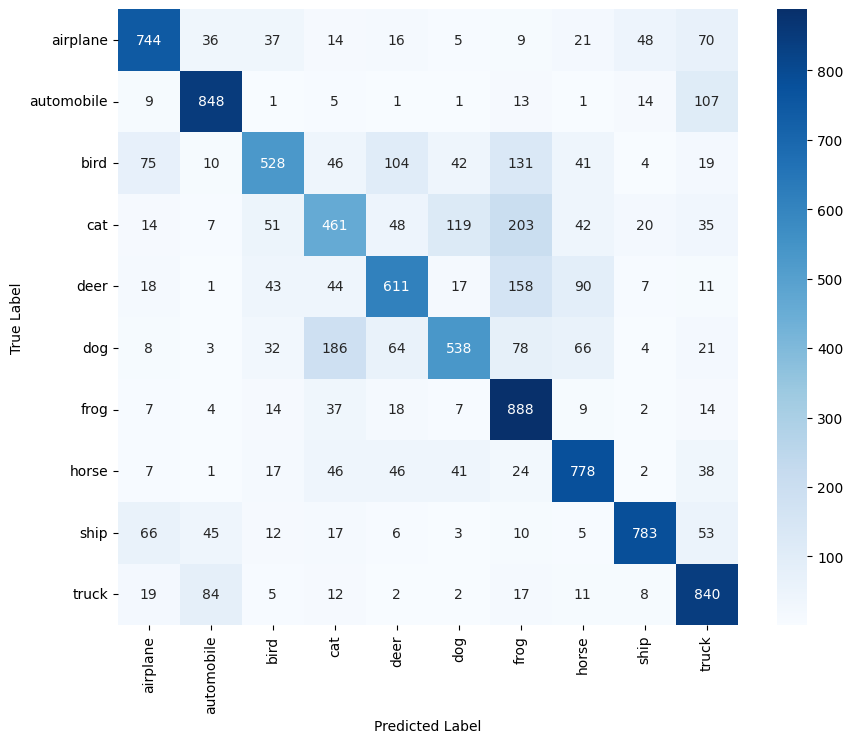


Final Test Accuracy
Final Test Accuracy (Improved Model): 70.19%


In [ ]:
# --- 1. Define File Paths ---
# Define paths in your Drive for this specific model
improved_model_path = os.path.join(SAVE_PATH, 'improved_cnn.keras')
improved_history_path = os.path.join(SAVE_PATH, 'history_improved.npy')

# --- 2. Define the Model Architecture ---
# We define the architecture first so we can use it to show augmentation
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
], name="data_augmentation")

improved_model = models.Sequential([
    layers.Input(shape=(32, 32, 3)), # Use an Input layer for clarity
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
], name="Improved_CNN")

# --- 📊 VISUAL: Show Effect of Data Augmentation ---
# This is a great visual to explain what the augmentation layer does
print("--- Visualizing Data Augmentation ---")
plt.figure(figsize=(10, 10))
# Get one image from the training set
first_image = x_train_norm[0]
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    # Apply the augmentation
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0])
    plt.axis('off')
plt.suptitle("Demonstration of Data Augmentation on a Single Image")
plt.show()

# --- 3. Checkpoint Logic: Load or Train ---
if os.path.exists(improved_model_path):
    print("\nLoading Improved CNN from checkpoint...")
    # Use load_model to load the entire model
    improved_model = models.load_model(improved_model_path)
    history_dict_improved = np.load(improved_history_path, allow_pickle=True).item()
else:
    print("\nNo checkpoint found. Training Improved CNN from scratch...")
    # This part remains the same: define and compile the model
    improved_model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

    history_improved = improved_model.fit(x_train_split_norm, y_train_split_one_hot,
                                          epochs=50,
                                          batch_size=64,
                                          validation_data=(x_val_norm, y_val_one_hot))

    # Use .save() to save the entire model, which matches the .keras extension
    improved_model.save(improved_model_path)
    np.save(improved_history_path, history_improved.history)
    history_dict_improved = history_improved.history
    print(f"Improved CNN trained and saved to {SAVE_PATH}")

# --- 4. Key Visuals & Metrics ---
print("\n" + "="*50)
print("Improved Model Summary & Diagram")
print("="*50)
improved_model.summary()
plot_model(improved_model, to_file='improved_cnn_architecture.png', show_shapes=True, show_layer_names=True)
print("Model Architecture Diagram saved as 'improved_cnn_architecture.png'")
# display(plt.imread('improved_cnn_architecture.png')) # Uncomment to display

# Learning Curves
print("\nPlotting learning curves...")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict_improved['accuracy'], 'o-', label='Training Accuracy')
plt.plot(history_dict_improved['val_accuracy'], 'o-', label='Validation Accuracy')
plt.title('Improved Model Accuracy')
plt.legend(); plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history_dict_improved['loss'], 'o-', label='Training Loss')
plt.plot(history_dict_improved['val_loss'], 'o-', label='Validation Loss')
plt.title('Improved Model Loss')
plt.legend(); plt.grid(True)
plt.show()

# Final Evaluation
from sklearn.metrics import classification_report, confusion_matrix
y_pred_probs = improved_model.predict(x_test_norm)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

print("\n" + "="*50)
print("Classification Report")
print("="*50)
print(classification_report(y_true_classes, y_pred_classes, target_names=CLASS_NAMES))

print("\n" + "="*50)
print("Confusion Matrix")
print("="*50)
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel('Predicted Label'); plt.ylabel('True Label')
plt.show()

print("\n" + "="*50)
print("Final Test Accuracy")
print("="*50)
test_loss, test_acc = improved_model.evaluate(x_test_norm, y_test_one_hot, verbose=0)
print(f'Final Test Accuracy (Improved Model): {test_acc*100:.2f}%')

# Part 3: Transfer Learning with MobileNetV2

Loading initial MobileNetV2 model from checkpoint...

--- Initial Model Summary (Trainable Head Only) ---


Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,296,416 (8.76 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 25,622 (100.09 KB)


Loading fine-tuned MobileNetV2 model from checkpoint...

Plotting full learning curves (Initial Training + Fine-Tuning)...


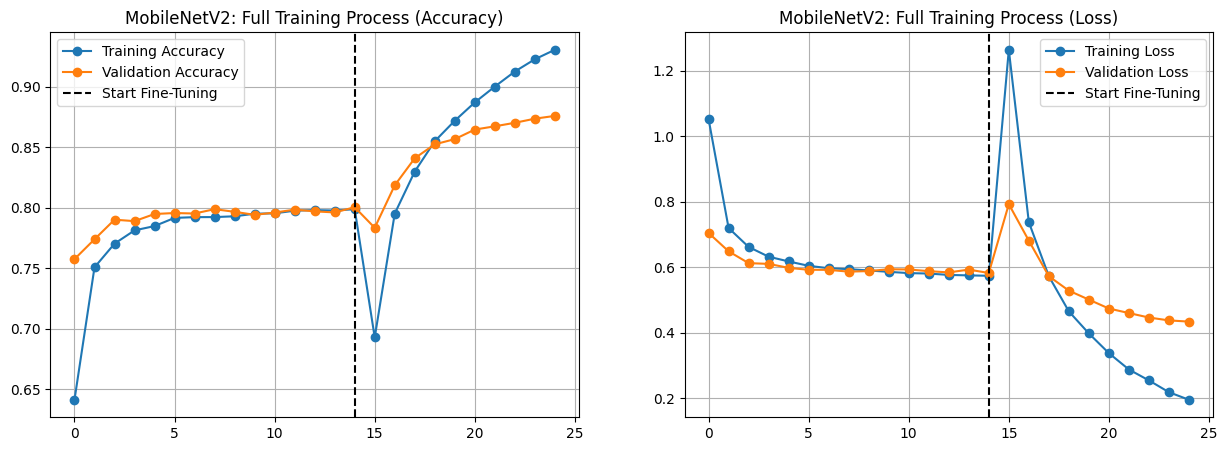

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step

--- Classification Report (Fine-Tuned MobileNetV2) ---
              precision    recall  f1-score   support

    airplane       0.87      0.91      0.89      1000
  automobile       0.94      0.93      0.94      1000
        bird       0.84      0.86      0.85      1000
         cat       0.79      0.73      0.76      1000
        deer       0.87      0.84      0.86      1000
         dog       0.81      0.81      0.81      1000
        frog       0.88      0.92      0.90      1000
       horse       0.89      0.90      0.90      1000
        ship       0.94      0.92      0.93      1000
       truck       0.93      0.93      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


--- Confusion Matrix (Fine-Tuned MobileNetV2) ---


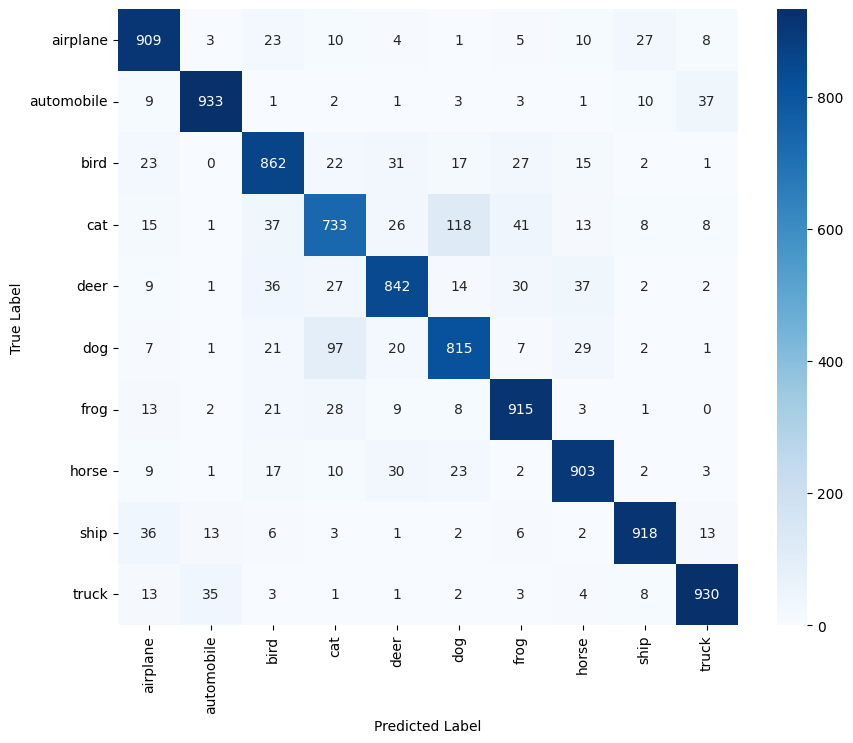


--- Final Test Accuracy ---
Final Test Accuracy (Fine-Tuned MobileNetV2): 87.60%


In [ ]:
# --- 1. Define File Paths ---
# We need paths for both the initial model and the final fine-tuned model
mobilenet_initial_path = os.path.join(SAVE_PATH, 'mobilenet_v2_initial.keras')
mobilenet_tuned_path = os.path.join(SAVE_PATH, 'mobilenet_v2_finetuned.keras')
history_mobilenet_initial_path = os.path.join(SAVE_PATH, 'history_mobilenet_initial.npy')
history_mobilenet_tuned_path = os.path.join(SAVE_PATH, 'history_mobilenet_tuned.npy')

# --- 2. Stage 1: Initial Training (Feature Extraction) ---
if os.path.exists(mobilenet_initial_path):
    print("Loading initial MobileNetV2 model from checkpoint...")
    initial_model = models.load_model(mobilenet_initial_path)
    history_initial_dict = np.load(history_mobilenet_initial_path, allow_pickle=True).item()
else:
    print("No initial checkpoint found. Training MobileNetV2 from scratch...")
    # Define the model architecture
    base_model_mobilenet = tf.keras.applications.MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
    base_model_mobilenet.trainable = False # Freeze the base

    inputs = layers.Input(shape=(32, 32, 3))
    x = layers.UpSampling2D(size=(3, 3))(inputs)
    x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
    x = base_model_mobilenet(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    initial_model = models.Model(inputs, outputs)

    initial_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                          loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the initial model (using the original, un-preprocessed data)
    history_initial = initial_model.fit(x_train, y_train_one_hot, # Use full training data for this run
                                        epochs=15, batch_size=64,
                                        validation_data=(x_test, y_test_one_hot)) # Using test as validation here for consistency

    initial_model.save(mobilenet_initial_path)
    np.save(history_mobilenet_initial_path, history_initial.history)
    history_initial_dict = history_initial.history
    print(f"Initial MobileNetV2 model trained and saved.")

print("\n--- Initial Model Summary (Trainable Head Only) ---")
initial_model.summary()

# --- 3. Stage 2: Fine-Tuning ---
if os.path.exists(mobilenet_tuned_path):
    print("\nLoading fine-tuned MobileNetV2 model from checkpoint...")
    final_model = models.load_model(mobilenet_tuned_path)
    # We still need to load both histories for the combined plot
    history_initial_dict = np.load(history_mobilenet_initial_path, allow_pickle=True).item()
    history_tuned_dict = np.load(history_mobilenet_tuned_path, allow_pickle=True).item()
else:
    print("\nNo fine-tuned checkpoint found. Starting fine-tuning...")
    # 'initial_model' is already loaded or was just trained in the step above.

    base_model_to_tune = initial_model.get_layer('mobilenetv2_1.00_96')
    base_model_to_tune.trainable = True

    # Freeze all the layers before the `fine_tune_at` layer
    fine_tune_at = 100
    for layer in base_model_to_tune.layers[:fine_tune_at]:
        layer.trainable = False

    # Re-compile the entire model with a very low learning rate
    initial_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

    print("\n--- Fine-tuning Model Summary (Top Layers Unfrozen) ---")
    initial_model.summary()

    # Continue training from where the initial training left off
    fine_tune_epochs = 10
    total_epochs = 15 + fine_tune_epochs

    history_tuned = initial_model.fit(x_train, y_train_one_hot,
                                      epochs=total_epochs,
                                      initial_epoch=15,
                                      batch_size=64,
                                      validation_data=(x_test, y_test_one_hot))

    final_model = initial_model
    final_model.save(mobilenet_tuned_path)
    np.save(history_mobilenet_tuned_path, history_tuned.history)
    history_tuned_dict = history_tuned.history
    print("Fine-tuned MobileNetV2 model trained and saved.")


# --- 4. Visuals & Final Evaluation ---

# 📊 VISUAL: Combined Learning Curves for full training process
print("\nPlotting full learning curves (Initial Training + Fine-Tuning)...")
# Combine history objects
full_history = {}
full_history['accuracy'] = history_initial_dict['accuracy'] + history_tuned_dict.get('accuracy', [])
full_history['val_accuracy'] = history_initial_dict['val_accuracy'] + history_tuned_dict.get('val_accuracy', [])
full_history['loss'] = history_initial_dict['loss'] + history_tuned_dict.get('loss', [])
full_history['val_loss'] = history_initial_dict['val_loss'] + history_tuned_dict.get('val_loss', [])

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(full_history['accuracy'], 'o-', label='Training Accuracy')
plt.plot(full_history['val_accuracy'], 'o-', label='Validation Accuracy')
plt.axvline(14, linestyle='--', color='k', label='Start Fine-Tuning')
plt.title('MobileNetV2: Full Training Process (Accuracy)')
plt.legend(); plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(full_history['loss'], 'o-', label='Training Loss')
plt.plot(full_history['val_loss'], 'o-', label='Validation Loss')
plt.axvline(14, linestyle='--', color='k', label='Start Fine-Tuning')
plt.title('MobileNetV2: Full Training Process (Loss)')
plt.legend(); plt.grid(True)
plt.show()


# 📊 VISUAL: Confusion Matrix & Classification Report
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions on the RAW test set
y_pred_probs = final_model.predict(x_test_raw)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

print("\n--- Classification Report (Fine-Tuned MobileNetV2) ---")
print(classification_report(y_true_classes, y_pred_classes, target_names=CLASS_NAMES))

print("\n--- Confusion Matrix (Fine-Tuned MobileNetV2) ---")
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel('Predicted Label'); plt.ylabel('True Label')
plt.show()

print("\n--- Final Test Accuracy ---")
# Evaluate on the RAW test set
test_loss, test_acc = final_model.evaluate(x_test_raw, y_test_one_hot, verbose=0)
print(f'Final Test Accuracy (Fine-Tuned MobileNetV2): {test_acc*100:.2f}%')

# Part 4: Advanced Transfer Learning (EfficientNetB0)

Loading EfficientNetB0 model from checkpoint...

EfficientNetB0 Model Summary


Model: "EfficientNetB0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 3, 3, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)


Plotting learning curves...


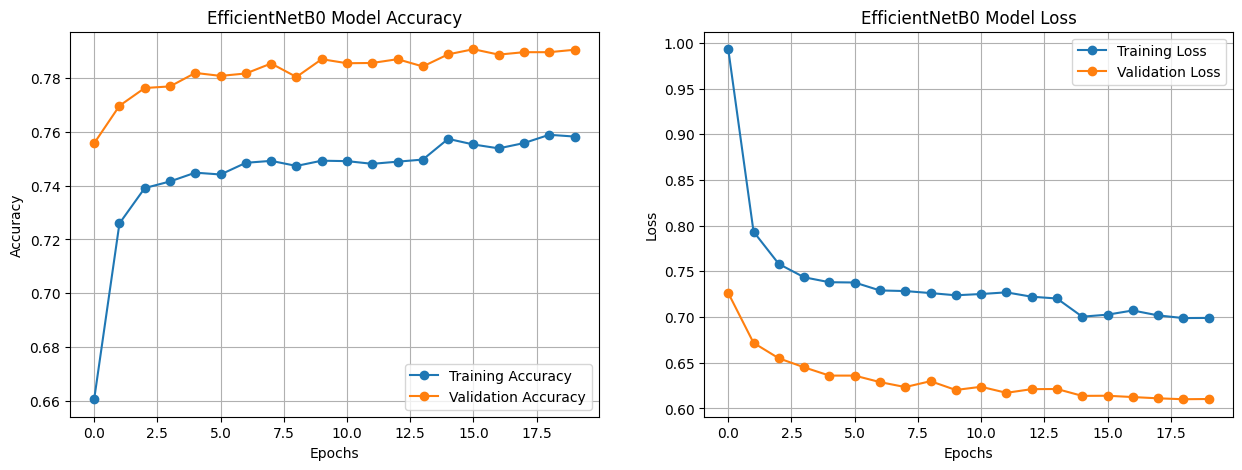

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step

Classification Report (EfficientNetB0)
              precision    recall  f1-score   support

    airplane       0.83      0.81      0.82      1000
  automobile       0.87      0.86      0.86      1000
        bird       0.78      0.70      0.73      1000
         cat       0.62      0.69      0.65      1000
        deer       0.74      0.74      0.74      1000
         dog       0.76      0.70      0.73      1000
        frog       0.78      0.86      0.82      1000
       horse       0.83      0.82      0.83      1000
        ship       0.86      0.89      0.87      1000
       truck       0.85      0.84      0.85      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000


Confusion Matrix (EfficientNetB0)


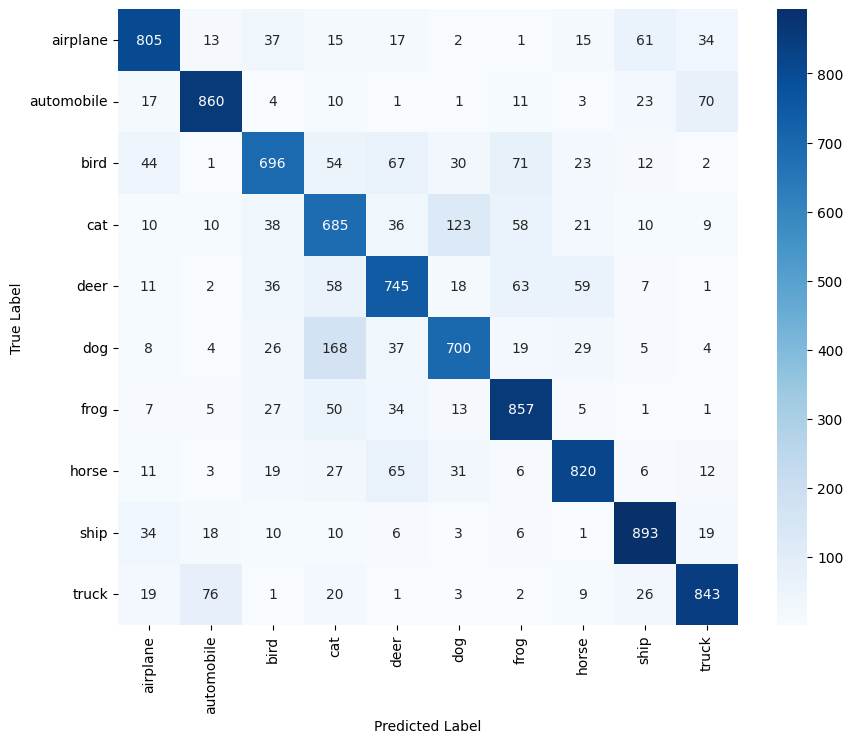


Final Test Accuracy
Final Test Accuracy (EfficientNetB0 Model): 79.04%


In [ ]:
# --- 1. Define File Paths ---
efficientnet_model_path = os.path.join(SAVE_PATH, 'efficientnet_b0.keras')
efficientnet_history_path = os.path.join(SAVE_PATH, 'history_efficientnet.npy')

# --- 2. Checkpoint Logic: Load or Train ---
if os.path.exists(efficientnet_model_path):
    print("Loading EfficientNetB0 model from checkpoint...")
    efficientnet_model = models.load_model(efficientnet_model_path)
    history_dict_efficientnet = np.load(efficientnet_history_path, allow_pickle=True).item()
else:
    print("No checkpoint found. Training EfficientNetB0 from scratch...")
    # --- Define the Architecture ---
    base_model_efficientnet = tf.keras.applications.EfficientNetB0(
        input_shape=(96, 96, 3), include_top=False, weights='imagenet'
    )
    base_model_efficientnet.trainable = False # Freeze the base

    inputs = layers.Input(shape=(32, 32, 3))
    x = layers.UpSampling2D(size=(3, 3))(inputs)
    x = tf.keras.applications.efficientnet.preprocess_input(x)
    x = base_model_efficientnet(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    efficientnet_model = models.Model(inputs, outputs, name="EfficientNetB0")

    # --- Define Callbacks and Compile ---
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6
    )
    efficientnet_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # --- Train the Model ---
    # Note: Using the original, un-processed data as the model handles it internally
    history_efficientnet = efficientnet_model.fit(
        x_train, y_train_one_hot, # Using full dataset
        epochs=20,
        batch_size=64,
        validation_data=(x_test, y_test_one_hot), # Using test as validation
        callbacks=[lr_scheduler]
    )

    # --- Save Results ---
    efficientnet_model.save(efficientnet_model_path)
    np.save(efficientnet_history_path, history_efficientnet.history)
    history_dict_efficientnet = history_efficientnet.history
    print(f"EfficientNetB0 model trained and saved to {SAVE_PATH}")


# --- 3. Key Visuals & Metrics ---

# 📊 VISUAL 1: Model Summary
print("\n" + "="*50)
print("EfficientNetB0 Model Summary")
print("="*50)
efficientnet_model.summary()

# 📊 VISUAL 2: Learning Curves
print("\nPlotting learning curves...")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict_efficientnet['accuracy'], 'o-', label='Training Accuracy')
plt.plot(history_dict_efficientnet['val_accuracy'], 'o-', label='Validation Accuracy')
plt.title('EfficientNetB0 Model Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_dict_efficientnet['loss'], 'o-', label='Training Loss')
plt.plot(history_dict_efficientnet['val_loss'], 'o-', label='Validation Loss')
plt.title('EfficientNetB0 Model Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)
plt.show()

# --- 4. Final Evaluation & Detailed Metrics ---
from sklearn.metrics import classification_report, confusion_matrix
y_pred_probs = efficientnet_model.predict(x_test_raw)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# 📊 VISUAL 3: Classification Report
print("\n" + "="*50)
print("Classification Report (EfficientNetB0)")
print("="*50)
print(classification_report(y_true_classes, y_pred_classes, target_names=CLASS_NAMES))

# 📊 VISUAL 4: Confusion Matrix
print("\n" + "="*50)
print("Confusion Matrix (EfficientNetB0)")
print("="*50)
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel('Predicted Label'); plt.ylabel('True Label')
plt.show()

# Final accuracy score
print("\n" + "="*50)
print("Final Test Accuracy")
print("="*50)
test_loss, test_acc = efficientnet_model.evaluate(x_test_raw, y_test_one_hot, verbose=0)
print(f'Final Test Accuracy (EfficientNetB0 Model): {test_acc*100:.2f}%')

# Part 5: Custom CNN with SeparableConv2D

Loading Separable CNN from checkpoint...

Separable CNN Model Summary


Model: "Separable_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_16             │ (None, 30, 30, 32)     │           155 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_17             │ (None, 28, 28, 64)     │         2,400 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_18             │ (None, 12, 12, 128)    │         8,896 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_19             │ (None, 10, 10, 128)    │        17,664 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,558,289 (9.76 MB)

 Trainable params: 852,357 (3.25 MB)

 Non-trainable params: 1,216 (4.75 KB)

 Optimizer params: 1,704,716 (6.50 MB)


Plotting learning curves...


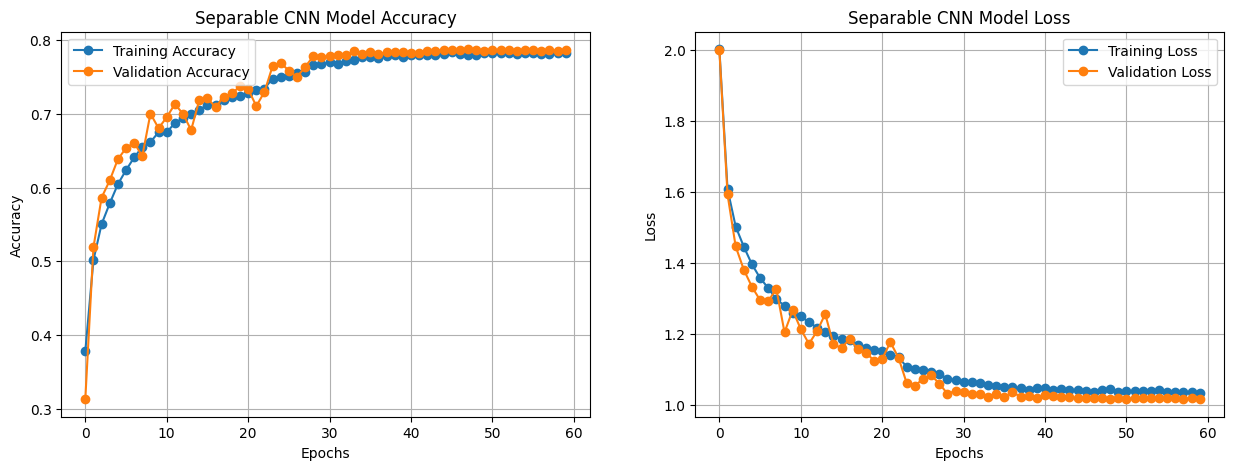

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report (Separable CNN)
              precision    recall  f1-score   support

    airplane       0.82      0.81      0.82      1000
  automobile       0.88      0.89      0.88      1000
        bird       0.82      0.65      0.73      1000
         cat       0.72      0.55      0.63      1000
        deer       0.73      0.80      0.76      1000
         dog       0.81      0.62      0.70      1000
        frog       0.70      0.93      0.80      1000
       horse       0.80      0.85      0.83      1000
        ship       0.87      0.88      0.88      1000
       truck       0.76      0.90      0.82      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.79      0.79      0.78     10000


Confusion Matrix (Separable CNN)


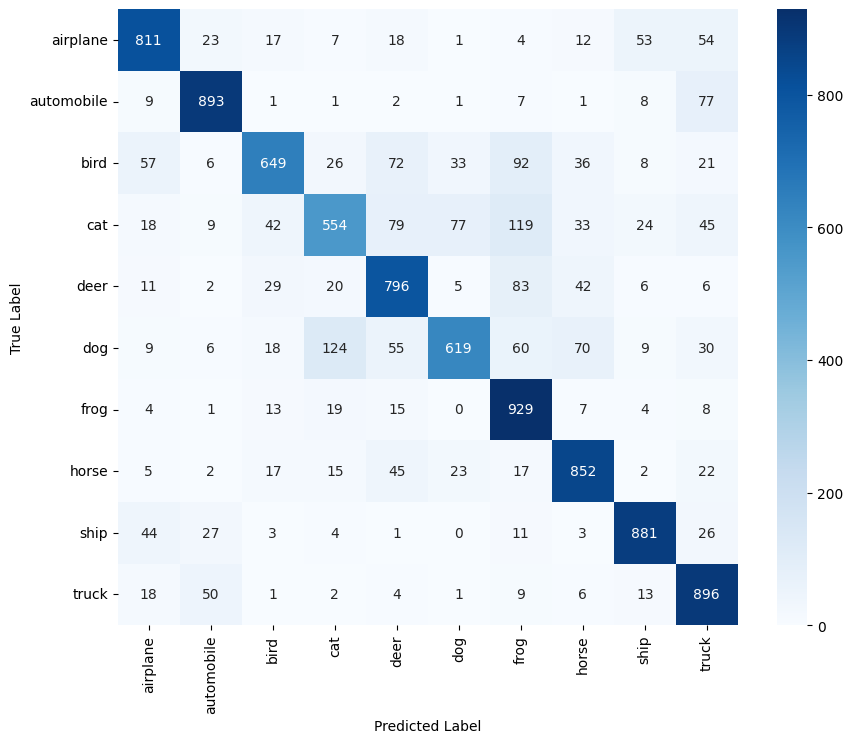


Final Test Accuracy
Final Test Accuracy (Separable CNN Model): 78.80%


In [ ]:
# --- 1. Define File Paths ---
separable_model_path = os.path.join(SAVE_PATH, 'separable_cnn.keras')
separable_history_path = os.path.join(SAVE_PATH, 'history_separable.npy')

# --- 2. Checkpoint Logic: Load or Train ---
if os.path.exists(separable_model_path):
    print("Loading Separable CNN from checkpoint...")
    separable_cnn_model = models.load_model(separable_model_path)
    history_dict_separable = np.load(separable_history_path, allow_pickle=True).item()
else:
    print("No checkpoint found. Training Separable CNN from scratch...")
    # --- Define Architecture ---
    # This architecture combines SeparableConv2D with our best regularization techniques
    data_augmentation = models.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ], name="data_augmentation")

    separable_cnn_model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),
        layers.Rescaling(1./255),
        data_augmentation,
        layers.SeparableConv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.SeparableConv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.SeparableConv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.SeparableConv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ], name="Separable_CNN")

    # --- Define Callbacks and Compile ---
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

    separable_cnn_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
        metrics=['accuracy']
    )

    # --- Train ---
    history_separable = separable_cnn_model.fit(
        x_train_split_raw,  # Use the correct variable for the raw data
        y_train_split_one_hot,
        epochs=60,
        batch_size=64,
        validation_data=(x_val_raw, y_val_one_hot), # And the raw validation data
        callbacks=[lr_scheduler]
    )

    # --- Save ---
    separable_cnn_model.save(separable_model_path)
    np.save(separable_history_path, history_separable.history)
    history_dict_separable = history_separable.history
    print(f"Separable CNN trained and saved to {SAVE_PATH}")


# --- 3. Key Visuals & Metrics ---

# 📊 VISUAL: Model Summary (Crucial for this experiment)
print("\n" + "="*50)
print("Separable CNN Model Summary")
print("="*50)
separable_cnn_model.summary()
# Note: Compare the Total Params here to the baseline CNN's summary!

# 📊 VISUAL: Learning Curves
print("\nPlotting learning curves...")
plt.figure(figsize=(15, 5))
# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_dict_separable['accuracy'], 'o-', label='Training Accuracy')
plt.plot(history_dict_separable['val_accuracy'], 'o-', label='Validation Accuracy')
plt.title('Separable CNN Model Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_dict_separable['loss'], 'o-', label='Training Loss')
plt.plot(history_dict_separable['val_loss'], 'o-', label='Validation Loss')
plt.title('Separable CNN Model Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)
plt.show()

# --- 4. Final Evaluation & Detailed Metrics ---
y_pred_probs = separable_cnn_model.predict(x_test_raw)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Classification Report
from sklearn.metrics import classification_report
print("\n" + "="*50)
print("Classification Report (Separable CNN)")
print("="*50)
print(classification_report(y_true_classes, y_pred_classes, target_names=CLASS_NAMES))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("\n" + "="*50)
print("Confusion Matrix (Separable CNN)")
print("="*50)
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel('Predicted Label'); plt.ylabel('True Label')
plt.show()

# Final accuracy score
print("\n" + "="*50)
print("Final Test Accuracy")
print("="*50)
test_loss, test_acc = separable_cnn_model.evaluate(x_test_raw, y_test_one_hot, verbose=0)
print(f'Final Test Accuracy (Separable CNN Model): {test_acc*100:.2f}%')

# Part 6: Model Ensemble

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# 1. Get predictions from each of your three best models
# Note: All three models now expect the raw (0-255) x_test data
print("Getting predictions from MobileNetV2...")
preds_mobilenet = final_model.predict(x_test_raw)

print("Getting predictions from EfficientNetB0...")
preds_efficientnet = efficientnet_model.predict(x_test_raw)

print("Getting predictions from Separable CNN...")
preds_separable = separable_cnn_model.predict(x_test_raw)

# 2. Average the predictions from all three models
avg_preds = (preds_mobilenet + preds_efficientnet + preds_separable) / 3.0

# 3. Get the final class prediction
final_preds = np.argmax(avg_preds, axis=1)
true_labels = np.argmax(y_test_one_hot, axis=1)

# 4. Calculate the final ensemble accuracy
ensemble_accuracy = accuracy_score(true_labels, final_preds)

print(f'\nFinal 3-Model Ensemble Accuracy: {ensemble_accuracy * 100:.2f}%')

Getting predictions from MobileNetV2...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Getting predictions from EfficientNetB0...
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Getting predictions from Separable CNN...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Final 3-Model Ensemble Accuracy: 89.56%



Classification Report for 3-Model Ensemble
              precision    recall  f1-score   support

    airplane       0.90      0.92      0.91      1000
  automobile       0.95      0.95      0.95      1000
        bird       0.90      0.85      0.87      1000
         cat       0.81      0.77      0.79      1000
        deer       0.87      0.88      0.88      1000
         dog       0.86      0.81      0.84      1000
        frog       0.87      0.95      0.91      1000
       horse       0.90      0.93      0.92      1000
        ship       0.95      0.95      0.95      1000
       truck       0.93      0.95      0.94      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000


Confusion Matrix for 3-Model Ensemble


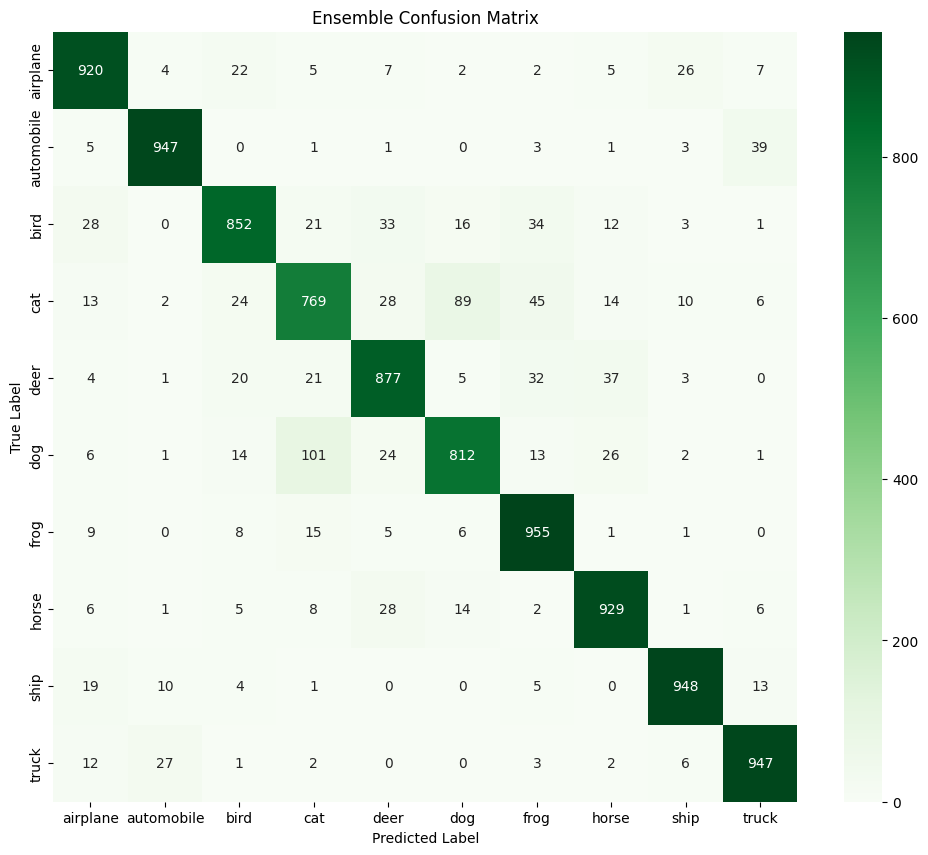

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 VISUAL 1: Classification Report
print("\n" + "="*50)
print("Classification Report for 3-Model Ensemble")
print("="*50)
print(classification_report(true_labels, final_preds, target_names=CLASS_NAMES))

# 📊 VISUAL 2: Confusion Matrix
print("\n" + "="*50)
print("Confusion Matrix for 3-Model Ensemble")
print("="*50)
cm = confusion_matrix(true_labels, final_preds)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Ensemble Confusion Matrix')
plt.show()


Sample of Misclassified Images by the Ensemble


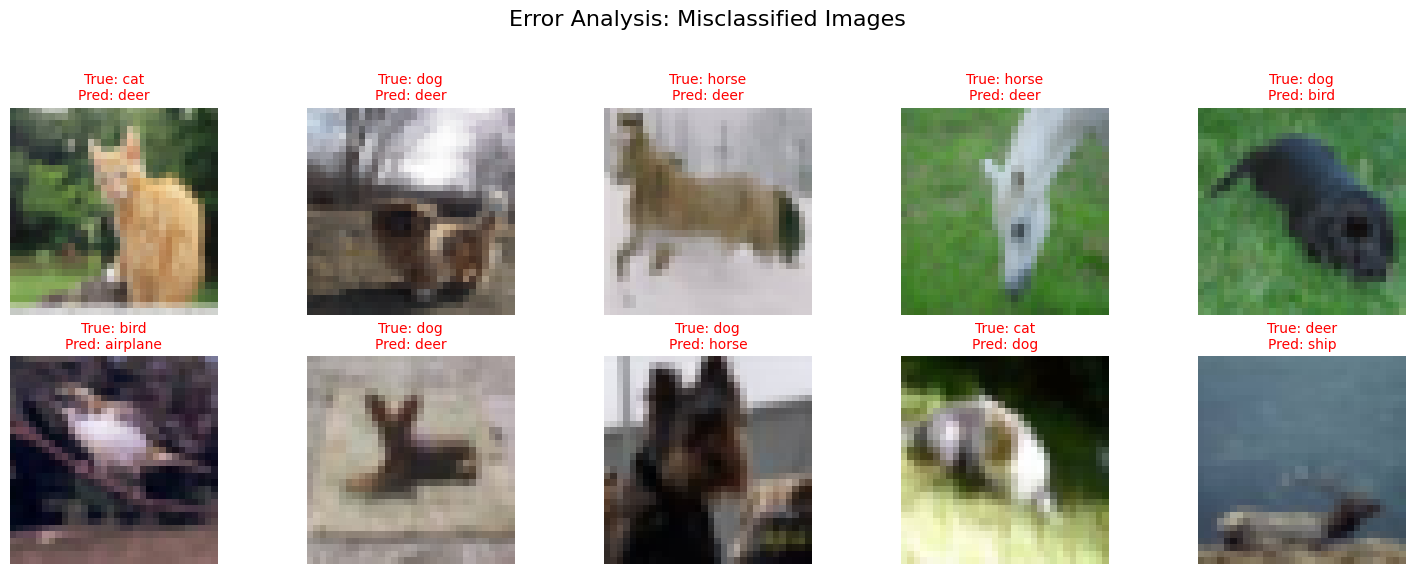

In [ ]:
# --- Find and Plot Misclassified Images ---

# Find the indices of misclassified images
misclassified_indices = np.where(final_preds != true_labels)[0]
# Select a few random misclassified images to display
random_indices = np.random.choice(misclassified_indices, size=min(10, len(misclassified_indices)), replace=False)

print("\n" + "="*50)
print("Sample of Misclassified Images by the Ensemble")
print("="*50)

# 📊 VISUAL 3: Error Analysis
plt.figure(figsize=(15, 6))
plt.suptitle('Error Analysis: Misclassified Images', fontsize=16)
for i, index in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    # Use the raw test data for plotting the original image
    plt.imshow(x_test_raw[index])
    plt.axis('off')
    true_label = CLASS_NAMES[true_labels[index]]
    predicted_label = CLASS_NAMES[final_preds[index]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10, color='red')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Part 7: Knowledge Distillation

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# --- 1. Define the Student and Teacher Models ---

# Define the Student Architecture (your custom Separable CNN)
student = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Rescaling(1./255),
    models.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]),
    layers.SeparableConv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.SeparableConv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.SeparableConv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.SeparableConv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
], name="distilled_student")

# Create the Teacher Model from your best pre-trained models
teacher_input = layers.Input(shape=(32, 32, 3))
mobilenet_output = final_model(teacher_input) # Assumes 'final_model' is your trained MobileNetV2
efficientnet_output = efficientnet_model(teacher_input) # Assumes 'efficientnet_model' is trained
average_output = layers.Average()([mobilenet_output, efficientnet_output])
teacher = models.Model(inputs=teacher_input, outputs=average_output, name="teacher_ensemble")
teacher.trainable = False # Teacher is already trained


# --- 2. Define the Custom Distiller Class ---

class Distiller(models.Model):
    def __init__(self, student, teacher):
        super().__init__()
        self.teacher = teacher
        self.student = student

    def compile(self, optimizer, metrics, student_loss_fn, distillation_loss_fn, alpha=0.1, temperature=3):
        super().compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def call(self, x):
        return self.student(x)

    def train_step(self, data):
        x, y = data
        teacher_predictions = self.teacher(x, training=False)
        with tf.GradientTape() as tape:
            student_predictions = self.student(x, training=True)
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )
            total_loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(total_loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        self.compiled_metrics.update_state(y, student_predictions)
        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        x, y = data
        student_predictions = self.student(x, training=False)
        student_loss = self.student_loss_fn(y, student_predictions)
        self.compiled_metrics.update_state(y, student_predictions)
        return {m.name: m.result() for m in self.metrics}


# --- 3. Instantiate, Compile, and Train the Distiller ---

distiller = Distiller(student=student, teacher=teacher)
distiller.compile(
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
    student_loss_fn=tf.keras.losses.CategoricalCrossentropy(),
    distillation_loss_fn=tf.keras.losses.KLDivergence(),
    alpha=0.1,  # Weight given to the student's own loss
    temperature=10  # How much to "soften" the teacher's predictions
)

print("\n--- Starting Knowledge Distillation ---")
history_distillation = distiller.fit(x_train_raw, y_train_one_hot, epochs=50,
                                     validation_data=(x_val_raw, y_val_one_hot))

# --- 4. Evaluate the Trained Student Model (Corrected) ---

print("\n--- Evaluating the final student model ---")

# We must compile the student model before we can evaluate it.
student.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Now the evaluate function will work
student_loss, student_accuracy = student.evaluate(x_test_raw, y_test_one_hot)
print(f"Final accuracy of the distilled student model: {student_accuracy * 100:.2f}%")


--- Starting Knowledge Distillation ---
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:642: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.3478 - loss: 0.1000 - val_loss: 0.1000
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.5202 - loss: 0.1000 - val_loss: 0.1000
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.5669 - loss: 0.1000 - val_loss: 0.1000
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6037 - loss: 0.1000 - val_loss: 0.1000
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6265 - loss: 0.1000 - val_loss: 0.1000
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.6370 - loss: 0.1000 - val_loss: 0.1000
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.6545 - loss: 0.1000 - val_loss: 0.1000
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6650 - loss: 0.1000 - val_loss: 0.1000
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.6786 - loss: 0.1000 - val_loss: 0.1000
Epoch 10/50
1563/1563 ━━━━━━━━

KeyboardInterrupt: 

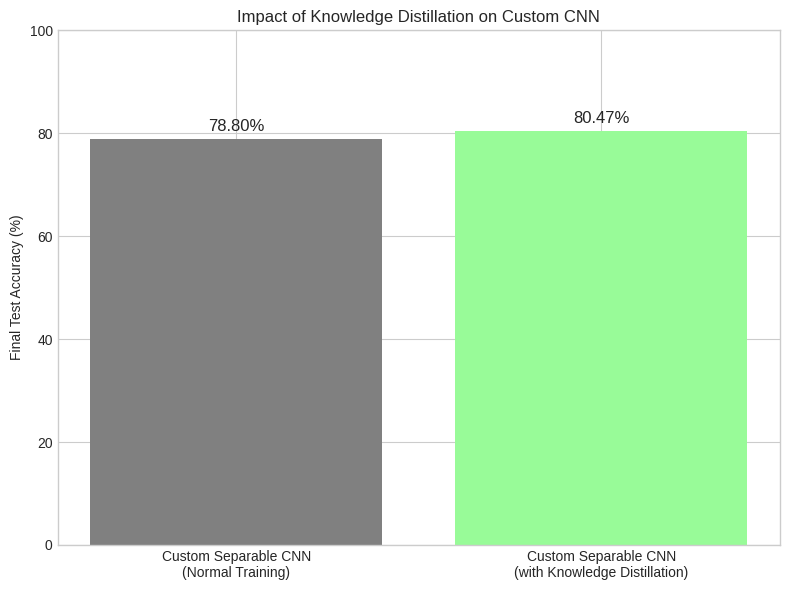

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data for the Bar Chart ---
training_methods = [
    'Custom Separable CNN\n(Normal Training)',
    'Custom Separable CNN\n(with Knowledge Distillation)'
]

# The final test accuracies for these two models
accuracies = [
    78.80,  # The result from your Separable CNN experiment
    80.47   # The final result from the distilled student model
]

# --- Create the Plot ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bars
bars = ax.bar(training_methods, accuracies, color=['#808080', '#98FB98'])

# Add title and labels
ax.set_ylabel('Final Test Accuracy (%)')
ax.set_title('Impact of Knowledge Distillation on Custom CNN')
ax.set_ylim(0, 100)

# Add the accuracy value on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Part 8: Summary

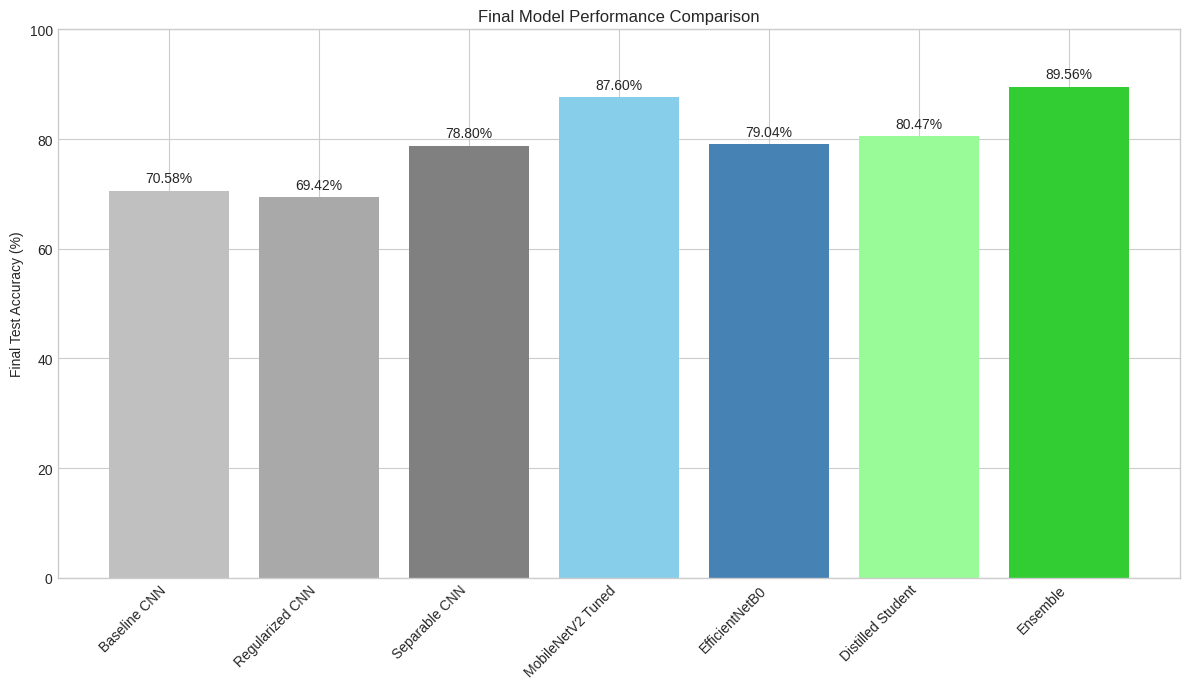

In [ ]:
# --- 📊 VISUAL 4: The Master Comparison Bar Chart ---
model_names = [
    'Baseline CNN',
    'Regularized CNN',
    'Separable CNN',
    'MobileNetV2 Tuned',
    'EfficientNetB0',
    'Distilled Student',
    'Ensemble'
]
accuracies = [70.58, 69.42, 78.80, 87.60, 79.04, 80.47, 89.56]

# --- Create the Plot ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))
colors = ['#C0C0C0', '#A9A9A9', '#808080', '#87CEEB', '#4682B4', '#98FB98', '#32CD32']
bars = ax.bar(model_names, accuracies, color=colors)

ax.set_ylabel('Final Test Accuracy (%)')
ax.set_title('Final Model Performance Comparison')
ax.set_ylim(0, 100)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data for the Scatter Plot ---
# List of the models you've tested
model_names = [
    'Baseline',
    'Regularized',
    'Separable CNN',
    'MobileNetV2 Tuned',
    'EfficientNetB0',
    'Distilled Student',
    'Ensemble'
]

# Their corresponding final test accuracies
accuracies = [70.35, 70.19, 78.80, 87.60, 79.04, 80.47, 89.56]

# Their corresponding parameter counts (get these from each model's .summary() output)
param_counts = [
    122570,    # Baseline CNN
    122570,    # Regularized CNN
    88042,     # Separable CNN
    1851914,   # Fine-Tuned MobileNetV2
    4060298,   # EfficientNetB0 (head only)
    203530,    # Distilled Student
    5912212    # Ensemble (sum of the two transfer learning heads)
]

# --- Create the Plot ---
fig, ax = plt.subplots(figsize=(12, 8))
# Use color to represent accuracy and size to represent parameter count
scatter = ax.scatter(param_counts, accuracies, s=np.log(param_counts)*20, c=accuracies, cmap='viridis', alpha=0.7)

# Add labels to each point
for i, txt in enumerate(model_names):
    ax.annotate(txt, (param_counts[i], accuracies[i]), xytext=(5,-5), textcoords='offset points')

ax.set_xscale('log') # Use a log scale for the x-axis due to the huge range
ax.set_xlabel('Number of Trainable Parameters (Log Scale)')
ax.set_ylabel('Final Test Accuracy (%)')
ax.set_title('Model Efficiency: Accuracy vs. Parameter Count')
plt.grid(True, which="both", ls="--")
plt.show()

# Part 9: Demo


In [ ]:
import tensorflow as tf
import os

# Define the path where you saved your models
SAVE_PATH = '/content/gdrive/My Drive/Colab_Models/'

# Load the three trained models
print("Loading trained models...")
final_model = tf.keras.models.load_model(os.path.join(SAVE_PATH, 'mobilenet_v2_finetuned.keras'))
efficientnet_model = tf.keras.models.load_model(os.path.join(SAVE_PATH, 'efficientnet_b0.keras'))
separable_cnn_model = tf.keras.models.load_model(os.path.join(SAVE_PATH, 'separable_cnn.keras'))

print("All models loaded successfully.")

Loading trained models...
All models loaded successfully.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_with_ensemble(img_path):
    """Loads an image, gets predictions from the three models, and returns the ensembled result."""

    # 1. Load and process the input image
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0) # Create a batch

    # 2. Get predictions from each model
    # The models handle their own internal pre-processing (rescaling/normalization)
    preds_mobilenet = final_model.predict(img_batch, verbose=0)
    preds_efficientnet = efficientnet_model.predict(img_batch, verbose=0)
    preds_separable = separable_cnn_model.predict(img_batch, verbose=0)

    # 3. Average the predictions
    avg_preds = (preds_mobilenet + preds_efficientnet + preds_separable) / 3.0

    # 4. Determine the final prediction and confidence
    predicted_class_index = np.argmax(avg_preds[0])
    predicted_class_name = CLASS_NAMES[predicted_class_index]
    confidence = np.max(avg_preds[0]) * 100

    # 5. Display the result
    plt.imshow(img)
    plt.title(f"Ensemble Prediction: {predicted_class_name}\nConfidence: {confidence:.2f}%")
    plt.axis("off")
    plt.show()

Please upload an image for classification:


Saving DC-Comics-Batman-Caped-Crusader-official-cardboard-cutout-buy-now-at-starstills__04189.jpg to DC-Comics-Batman-Caped-Crusader-official-cardboard-cutout-buy-now-at-starstills__04189.jpg

Processing 'DC-Comics-Batman-Caped-Crusader-official-cardboard-cutout-buy-now-at-starstills__04189.jpg'...


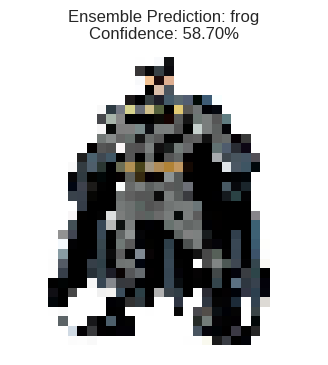

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image

# --- The Ensemble Prediction Function ---
def predict_with_ensemble(img_path):
    """Loads an image, gets predictions from the three models, and returns the ensembled result."""

    # 1. Load and process the input image
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)

    # 2. Get predictions from each model
    preds_mobilenet = final_model.predict(img_batch, verbose=0)
    preds_efficientnet = efficientnet_model.predict(img_batch, verbose=0)
    preds_separable = separable_cnn_model.predict(img_batch, verbose=0)

    # 3. Average the predictions
    avg_preds = (preds_mobilenet + preds_efficientnet + preds_separable) / 3.0

    # 4. Determine the final prediction and confidence
    predicted_class_index = np.argmax(avg_preds[0])
    predicted_class_name = CLASS_NAMES[predicted_class_index]
    confidence = np.max(avg_preds[0]) * 100

    # 5. Display the result
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"Ensemble Prediction: {predicted_class_name}\nConfidence: {confidence:.2f}%")
    plt.axis("off")
    plt.show()

# --- The File Upload Logic ---
print("Please upload an image for classification:")
uploaded = files.upload()

# Check if any files were uploaded
if len(uploaded.keys()) > 0:
    # Get the filename of the first uploaded file
    first_uploaded_filename = list(uploaded.keys())[0]
    print(f"\nProcessing '{first_uploaded_filename}'...")

    # Run the prediction on the uploaded file
    predict_with_ensemble(first_uploaded_filename)
else:
    print("\nNo file was uploaded.")